<a href="https://colab.research.google.com/github/lazy-wolf/TME_6015/blob/main/Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
from keras.layers import Dropout
from keras.models import load_model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import itertools

In [51]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [52]:
dataframe = pd.read_csv("/content/drive/MyDrive/TME_6015/Project/BTC-USD.csv")

In [53]:
dataframe.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [54]:
dataframe.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3352,2023-11-21,37469.16016,37631.14063,35813.81250,35813.81250,35813.81250,2.517216e+10
3353,2023-11-22,35756.55469,37856.98047,35670.97266,37432.33984,37432.33984,2.439725e+10
3354,2023-11-23,37420.43359,37643.91797,36923.86328,37289.62109,37289.62109,1.421495e+10
3355,2023-11-24,37296.31641,38415.33984,37261.60547,37720.28125,37720.28125,2.292296e+10
3356,2023-11-25,37721.41406,37892.42969,37617.41797,37796.79297,37796.79297,9.099571e+09


In [55]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3357 entries, 0 to 3356
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3357 non-null   object 
 1   Open       3357 non-null   float64
 2   High       3357 non-null   float64
 3   Low        3357 non-null   float64
 4   Close      3357 non-null   float64
 5   Adj Close  3357 non-null   float64
 6   Volume     3357 non-null   float64
dtypes: float64(6), object(1)
memory usage: 183.7+ KB


In [56]:
dataframe.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3357.000000,3357.000000,3357.000000,3357.000000,3357.000000,3.357000e+03
mean,14280.733942,14617.408292,13917.086255,14290.522958,14290.522958,1.648368e+10
std,16024.100730,16413.765412,15585.277279,16024.424885,16024.424885,1.916332e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,898.171997,913.184021,879.807007,899.072998,899.072998,1.477750e+08
50%,8169.060059,8296.694336,7944.776855,8180.479980,8180.479980,1.100281e+10
75%,23150.929690,23578.650390,22747.835940,23164.318360,23164.318360,2.689636e+10
max,67549.734380,68789.625000,66382.062500,67566.828130,67566.828130,3.509680e+11


In [57]:
dataframe.columns.tolist()

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [58]:
dataframe.shape

(3357, 7)

In [59]:
print(f"Columns : {dataframe.shape[1]} || Rows : {dataframe.shape[0]}")

Columns : 7 || Rows : 3357


In [60]:
na_values = dataframe.isna().values.sum()
null_values = dataframe.isnull().values.sum()
print(f"NA Values : {na_values} || Null Values : {null_values}")

NA Values : 0 || Null Values : 0


In [61]:
print(f"Dataset -> Start Date : {dataframe.iloc[0,0]} || End Date : {dataframe.iloc[-1,0]}")

Dataset -> Start Date : 2014-09-17 || End Date : 2023-11-25


In [62]:
dataframe['Date'] = pd.to_datetime(dataframe['Date'])

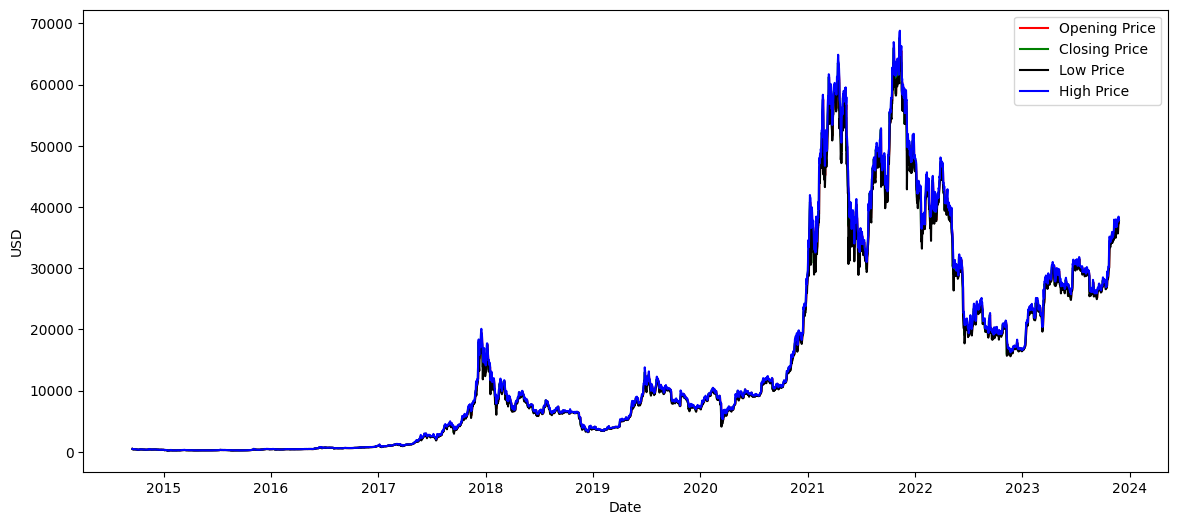

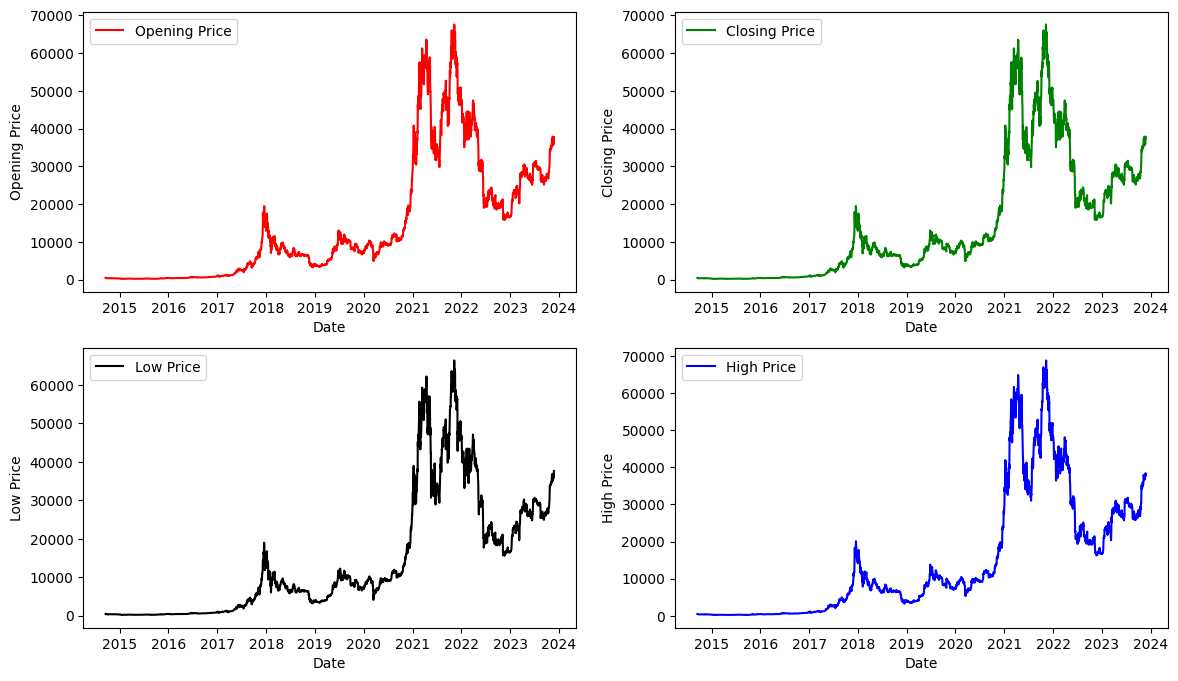

In [63]:
plt.figure(figsize=(14,6), dpi= 100, facecolor='w', edgecolor='k')

plt.plot(dataframe['Date'], dataframe['Open'], color='red', label = 'Opening Price')
plt.plot(dataframe['Date'], dataframe['Close'], color='green', label = 'Closing Price')
plt.plot(dataframe['Date'], dataframe['Low'], color='black', label = 'Low Price')
plt.plot(dataframe['Date'], dataframe['High'], color='blue', label = 'High Price')
plt.xlabel('Date')
plt.ylabel('USD')
plt.legend(loc='best')

plt.subplots(2, 2, figsize = (14, 8))

ax1 = plt.subplot(2, 2, 1)
plt.plot(dataframe['Date'], dataframe['Open'], color='red', label = 'Opening Price')
plt.xlabel('Date')
plt.ylabel('Opening Price')
plt.legend(loc='best')

ax2 = plt.subplot(2, 2, 2)
plt.plot(dataframe['Date'], dataframe['Close'], color='green', label = 'Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='best')

ax3 = plt.subplot(2, 2, 3)
plt.plot(dataframe['Date'], dataframe['Low'], color='black', label = 'Low Price')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.legend(loc='best')

ax4 = plt.subplot(2, 2, 4)
plt.plot(dataframe['Date'], dataframe['High'], color='blue', label = 'High Price')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.legend(loc='best')

plt.show()

In [64]:
final_dataframe = dataframe.drop(['Date','Close', 'Low', 'High','Adj Close'], axis=1)

In [65]:
final_dataframe.head()

,Open,Volume
0,465.864014,21056800.0
1,456.859985,34483200.0
2,424.102997,37919700.0
3,394.673004,36863600.0
4,408.084991,26580100.0


In [66]:
scalar = MinMaxScaler(feature_range=(0, 1))
dataframe_scaled = scalar.fit_transform(final_dataframe)

In [67]:
dataframe_scaled.shape

(3357, 2)

In [68]:
dataframe_scaled[0,:]

array([4.28907290e-03, 4.31449169e-05])

In [115]:
def create_train_test_dataset(dataframe, past_values = 1, train_test_split = 0):
  data_x, data_y = [], []
  for i in range(len(dataframe)-past_values):
    data_x.append(dataframe[i:i+past_values,:])
    data_y.append(dataframe[i+past_values:i+past_values+1,0])
  # print(len(data_x),len(data_y))
  split_index = int(round(train_test_split * len(dataframe)))
  x_train, x_test = data_x[:split_index], data_x[split_index:]
  y_train, y_test = data_y[:split_index], data_y[split_index:]
  return np.array(data_x), np.array(data_y), np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)

In [116]:
data_x, data_y, x_train, y_train, x_test, y_test = create_train_test_dataset(dataframe_scaled, 25, 0.8)

In [71]:
x_train.shape, y_train.shape

((2686, 25, 2), (2686, 1))

In [72]:
x_test.shape, y_test.shape

((646, 25, 2), (646, 1))

In [73]:
model = Sequential()
model.add(LSTM(units=16, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2]), activation = "relu"))
model.add(Dropout(0.2))
model.add(LSTM(units=16, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_37 (LSTM)              (None, 25, 16)            1216      
                                                                 
 dropout_37 (Dropout)        (None, 25, 16)            0         
                                                                 
 lstm_38 (LSTM)              (None, 16)                2112      
                                                                 
 dropout_38 (Dropout)        (None, 16)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3345 (13.07 KB)
Trainable params: 3345 (13.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

history = model.fit(x_train, y_train, validation_split=0.3, epochs=40, batch_size=64, callbacks=[early_stop])

Epoch 1/40
30/30 [==============================] - 5s 47ms/step - loss: 0.0038 - root_mean_squared_error: 0.0613 - val_loss: 0.1677 - val_root_mean_squared_error: 0.4096
Epoch 2/40
30/30 [==============================] - 1s 27ms/step - loss: 0.0016 - root_mean_squared_error: 0.0403 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0843
Epoch 3/40
30/30 [==============================] - 1s 26ms/step - loss: 3.9784e-04 - root_mean_squared_error: 0.0199 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0983
Epoch 4/40
30/30 [==============================] - 1s 25ms/step - loss: 3.1293e-04 - root_mean_squared_error: 0.0177 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0919
Epoch 5/40
30/30 [==============================] - 1s 25ms/step - loss: 2.9034e-04 - root_mean_squared_error: 0.0170 - val_loss: 0.0066 - val_root_mean_squared_error: 0.0814
Epoch 6/40
30/30 [==============================] - 1s 27ms/step - loss: 2.7705e-04 - root_mean_squared_error: 0.0166 - val_loss: 0.0

In [75]:
history.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

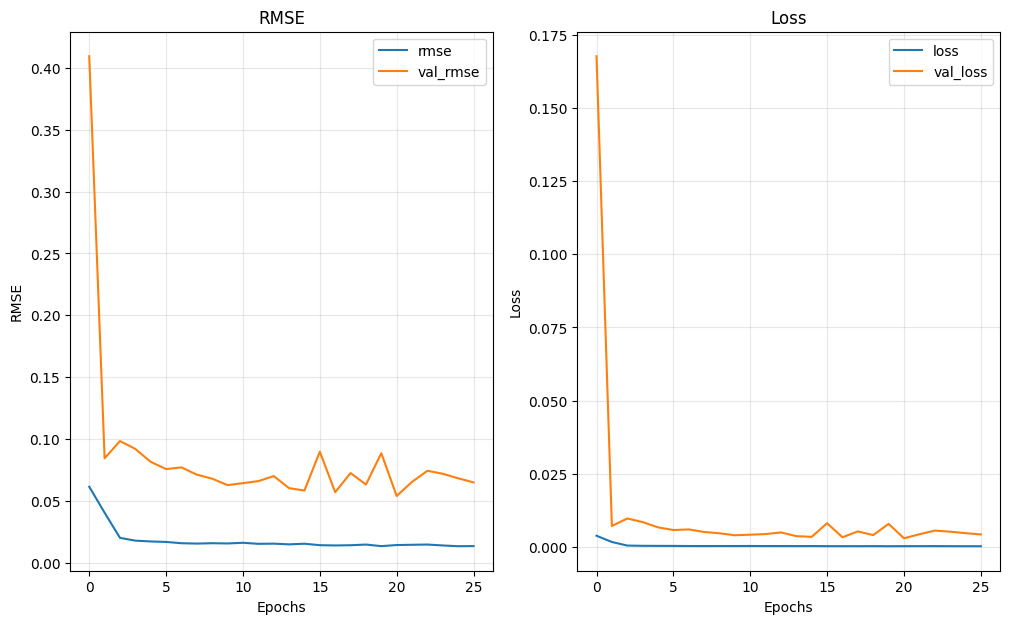

In [76]:
fig = plt.figure(figsize=(12,7))
fig.add_subplot(121)

# Accuracy
plt.plot(history.epoch, history.history['root_mean_squared_error'], label = "rmse")
plt.plot(history.epoch, history.history['val_root_mean_squared_error'], label = "val_rmse")

plt.title("RMSE")
plt.xlabel("Epochs")
plt.ylabel("RMSE")
plt.grid(alpha=0.3)
plt.legend()


#Adding Subplot 1 (For Loss)
fig.add_subplot(122)

plt.plot(history.epoch, history.history['loss'], label="loss")
plt.plot(history.epoch, history.history['val_loss'], label="val_loss")

plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(alpha=0.3)
plt.legend()

plt.show()

In [77]:
results = model.evaluate(x_test, y_test)
print("test loss , test rmse :", np.round(results, 4))

21/21 [==============================] - 0s 5ms/step - loss: 0.0021 - root_mean_squared_error: 0.0457
test loss , test rmse : [0.0021 0.0457]


In [78]:
def HyperParameter_Tuning(config, x_train, y_train, x_test, y_test):
  additional_layer, neurons, batch_size, dropout = config
  possible_combinations = list(itertools.product(additional_layer, neurons, batch_size, dropout))
  print("*"*25)
  print(f"Possible No.of Combinations : {possible_combinations}")
  print("*"*25)
  hist = []
  for i in range(len(possible_combinations)):
    print("*"*25)
    print(f"Combination : {i+1}")
    print("*"*25)
    additional_layer, neurons, batch_size, dropout = possible_combinations[i]
    model = Sequential()
    model.add(LSTM(units=neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2]), activation = "relu"))
    model.add(Dropout(dropout))
    if additional_layer:
      model.add(LSTM(units=neurons, return_sequences=True))
      model.add(Dropout(dropout))
    model.add(LSTM(units=neurons, return_sequences=False))
    model.add(Dropout(dropout))
    model.add(Dense(units=1, activation='linear'))
    model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
    early_stops = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
    file_path = 'best_model.h5'
    model_check = ModelCheckpoint(file_path, monitor='val_loss', mode='min', verbose=1, save_best_only=True)
    model.fit(x_train, y_train, validation_split=0.3, epochs=40, batch_size=batch_size, callbacks=[early_stop, model_check], verbose=0)
    train_loss, train_rmse = model.evaluate(x_train, y_train, verbose=0)
    test_loss, test_rmse = model.evaluate(x_test, y_test, verbose=0)
    hist.append(list((additional_layer, neurons, batch_size, dropout, train_loss, train_rmse, test_loss, test_rmse)))
    print(f"Combination : {i+1} -> {possible_combinations[i]} train_rmse : {train_rmse} test_rmse : {test_rmse}")
    print("*"*25)
    print("*"*25)
  return hist



In [79]:
config = [[False,True], [16, 32], [8, 16, 32], [0.2]]

hist = HyperParameter_Tuning(config, x_train, y_train, x_test, y_test)

*************************
Possible No.of Combinations : [(False, 16, 8, 0.2), (False, 16, 16, 0.2), (False, 16, 32, 0.2), (False, 32, 8, 0.2), (False, 32, 16, 0.2), (False, 32, 32, 0.2), (True, 16, 8, 0.2), (True, 16, 16, 0.2), (True, 16, 32, 0.2), (True, 32, 8, 0.2), (True, 32, 16, 0.2), (True, 32, 32, 0.2)]
*************************
*************************
Combination : 1
*************************

Epoch 1: val_loss improved from inf to 0.00959, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss did not improve from 0.00959

Epoch 3: val_loss improved from 0.00959 to 0.00879, saving model to best_model.h5

Epoch 4: val_loss did not improve from 0.00879

Epoch 5: val_loss improved from 0.00879 to 0.00718, saving model to best_model.h5

Epoch 6: val_loss did not improve from 0.00718

Epoch 7: val_loss improved from 0.00718 to 0.00551, saving model to best_model.h5

Epoch 8: val_loss did not improve from 0.00551

Epoch 9: val_loss improved from 0.00551 to 0.00494, saving model to best_model.h5

Epoch 10: val_loss did not improve from 0.00494

Epoch 11: val_loss did not improve from 0.00494

Epoch 12: val_loss did not improve from 0.00494

Epoch 13: val_loss did not improve from 0.00494

Epoch 14: val_loss did not improve from 0.00494
Epoch 14: early stopping
Combination : 1 -> (False, 16, 8, 0.2) train_rmse : 0.06521540135145187 test_rmse : 0.07143338024616241
*************************
*************************
*************************
Combination : 2
********

In [80]:
hist = pd.DataFrame(hist, columns=["Additional Layer", "Neurons", "Batch Size", "Drop Out", "Train Loss", "Train RMSE", "Test Loss", "Test RMSE"])
hist = hist.sort_values(by=["Test RMSE"], ascending=True)
hist

,Additional Layer,Neurons,Batch Size,Drop Out,Train Loss,Train RMSE,Test Loss,Test RMSE
5,False,32,32,0.2,0.001115,0.033397,0.001455,0.038149
10,True,32,16,0.2,0.001884,0.043404,0.001607,0.040089
1,False,16,16,0.2,0.001886,0.043423,0.001873,0.043277
3,False,32,8,0.2,0.001884,0.043410,0.001887,0.043444
4,False,32,16,0.2,0.002922,0.054056,0.002731,0.052260
7,True,16,16,0.2,0.004934,0.070241,0.003755,0.061277
11,True,32,32,0.2,0.003322,0.057636,0.004302,0.065593
9,True,32,8,0.2,0.004955,0.070394,0.004655,0.068226
6,True,16,8,0.2,0.004893,0.069953,0.004699,0.068550
8,True,16,32,0.2,0.005669,0.075290,0.005058,0.071120


In [87]:
print("*"*25)
print(f"----Best Combination---- \n Additonal Layer = {hist.iloc[0,0]}\n Neurons = {hist.iloc[0,1]}\n Batch Size = {hist.iloc[0,2]}\n Drop Out = {hist.iloc[0,3]}\n")
print("*"*25)
print("*"*25)
before_rmse = np.round(results, 4)[1]
after_rmse = np.round(hist.iloc[0, -1], 4)
print(f'Results Before Tunning:\n Test Set RMSE: {before_rmse}\n')
print(f'Results After Tunning:\n Test Set RMSE: {after_rmse}\n')
print(f'{np.round((before_rmse-after_rmse)*100/before_rmse)}% Improvement')

*************************
----Best Combination---- 
 Additonal Layer = False
 Neurons = 32
 Batch Size = 32
 Drop Out = 0.2

*************************
*************************
Results Before Tunning:
 Test Set RMSE: 0.0457

Results After Tunning:
 Test Set RMSE: 0.0381

17.0% Improvement


In [88]:
additional_layer, neurons, batch_size, dropout = list(hist.iloc[0, :-4])

In [89]:
model = Sequential()
model.add(LSTM(units=neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2]), activation = "relu"))
model.add(Dropout(dropout))

if additional_layer:
    model.add(LSTM(units=neurons, return_sequences=True))
    model.add(Dropout(dropout))

model.add(LSTM(units=neurons, return_sequences=False))
model.add(Dropout(dropout))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

file_path = 'best_model.h5'

model_check = ModelCheckpoint(file_path, monitor='val_loss', mode='min', verbose=1, save_best_only=True)

model.fit(x_train, y_train, validation_split=0.3, epochs=40, batch_size=batch_size, callbacks=[early_stop, model_check], verbose=0)


Epoch 1: val_loss improved from inf to 0.00286, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss did not improve from 0.00286

Epoch 3: val_loss did not improve from 0.00286

Epoch 4: val_loss did not improve from 0.00286

Epoch 5: val_loss did not improve from 0.00286

Epoch 6: val_loss did not improve from 0.00286
Epoch 6: early stopping


In [90]:
model.evaluate(x_test, y_test)

21/21 [==============================] - 0s 6ms/step - loss: 0.0029


0.0029265182092785835

21/21 [==============================] - 1s 6ms/step


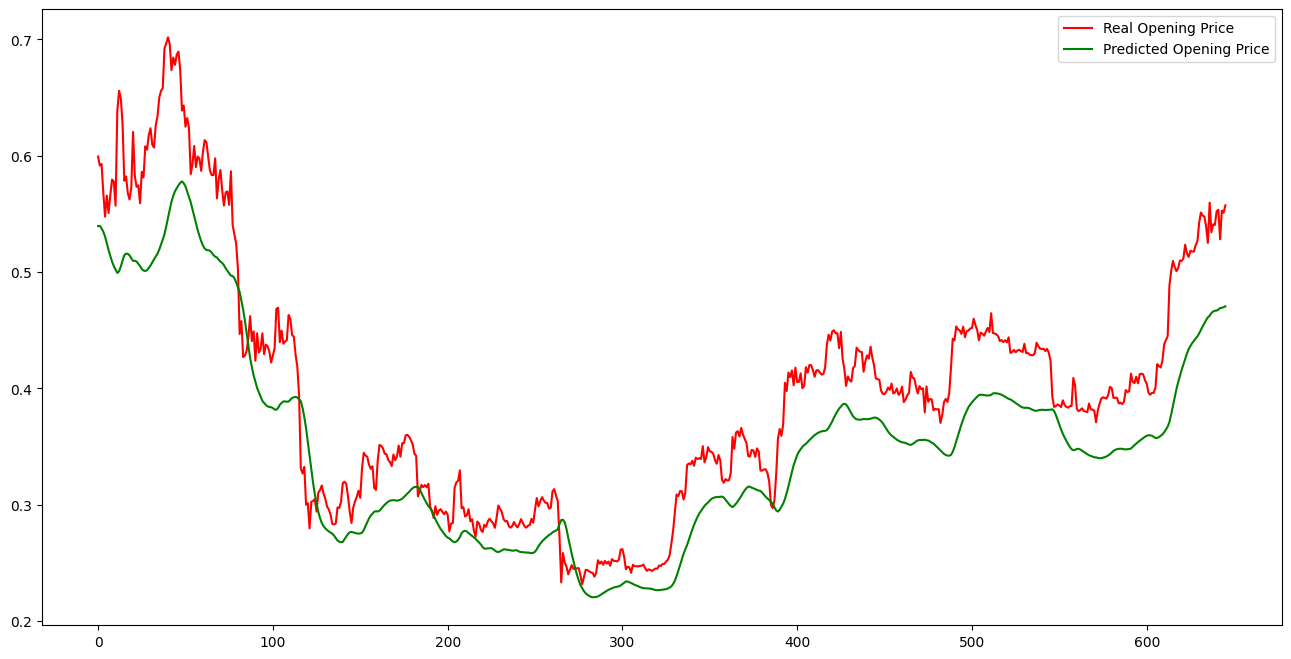

In [91]:
y_pred = model.predict(x_test)

plt.figure(figsize=(16,8), dpi= 100, facecolor='w', edgecolor='k')

plt.plot(y_test, color='red', label = 'Real Opening Price')
plt.plot(y_pred, color='green', label = 'Predicted Opening Price')
plt.legend(loc='best')

In [117]:
data_x.shape, data_y.shape

((3332, 25, 2), (3332, 1))

105/105 [==============================] - 1s 12ms/step


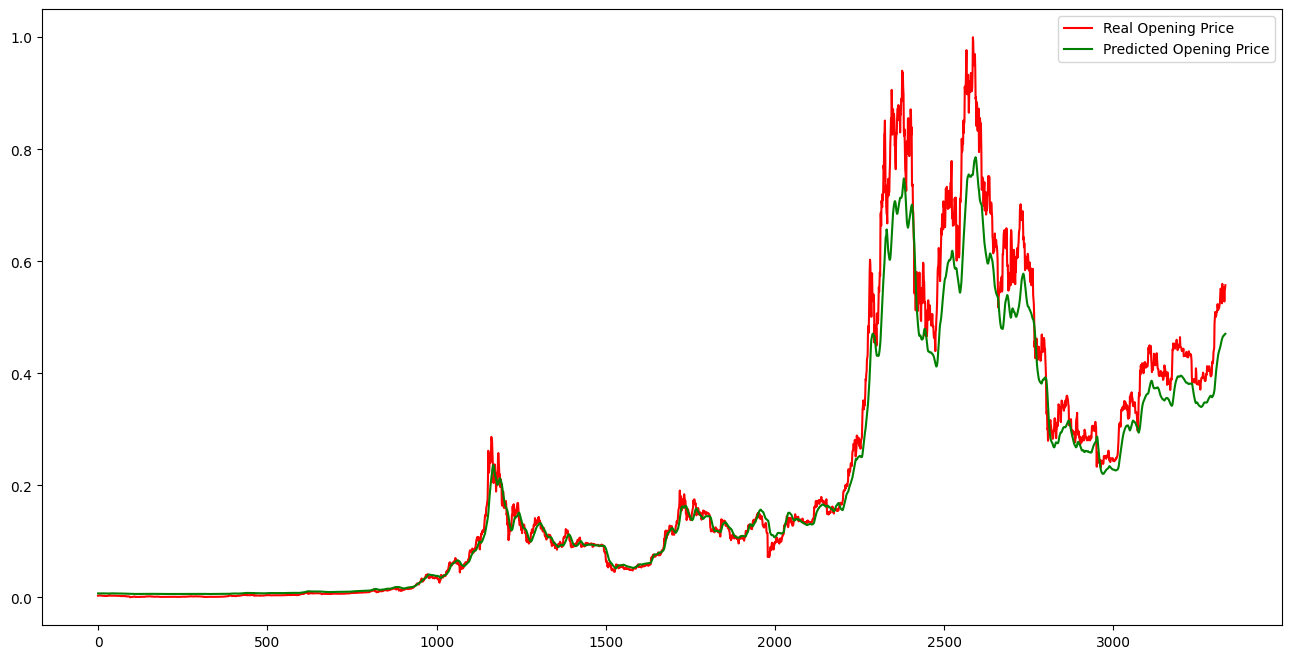

In [120]:
pred_data_y = model.predict(data_x)

plt.figure(figsize=(16,8), dpi= 100, facecolor='w', edgecolor='k')

plt.plot(data_y, color='red', label = 'Real Opening Price')
plt.plot(pred_data_y, color='green', label = 'Predicted Opening Price')
plt.legend(loc='best')

In [134]:
new_data = [list((i[0],0)) for i in data_y]
data = scalar.inverse_transform(new_data)
imp_data = [i for i, j in data]

In [157]:
imp_data[:5]

[362.605988, 377.92099, 391.691986, 400.954987, 394.518005]

In [136]:
new_data = [list((i[0],0)) for i in pred_data_y]
data = scalar.inverse_transform(new_data)
pred_imp_data = [i for i, j in data]

In [158]:
pred_imp_data[:5]

[639.1674739915129,
 637.4431554425156,
 636.6223770523758,
 636.9381768870653,
 638.295808721593]

In [142]:
df = pd.DataFrame(imp_data, columns=['Open'])

In [153]:
df['Date']=list(dataframe.iloc[25:,0])

In [155]:
df['Pred Open'] = pred_imp_data

In [156]:
df.head()

,Open,Date,Pred Open
0,362.605988,2014-10-12,639.167474
1,377.920990,2014-10-13,637.443155
2,391.691986,2014-10-14,636.622377
3,400.954987,2014-10-15,636.938177
4,394.518005,2014-10-16,638.295809


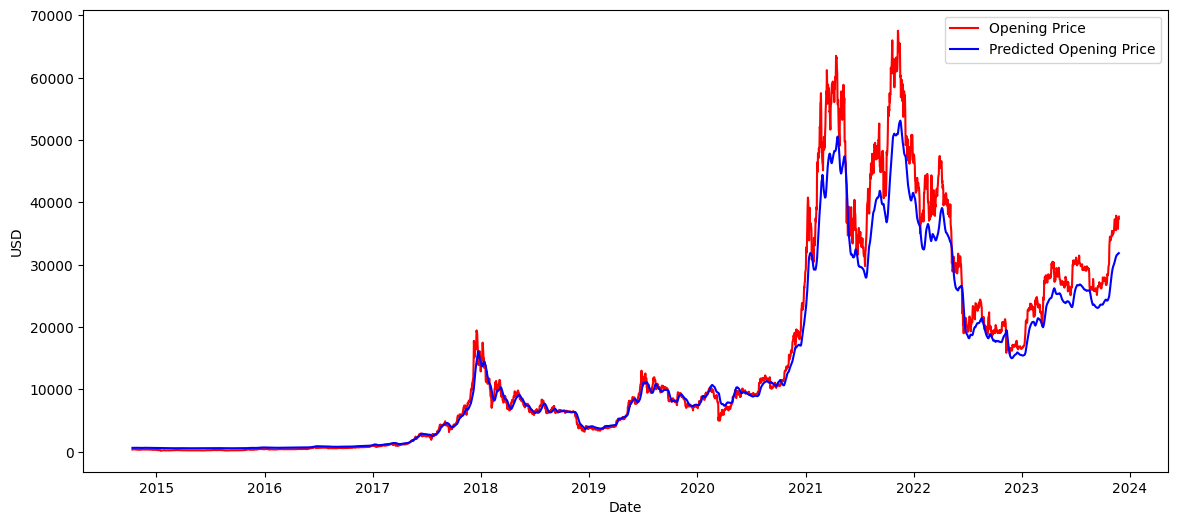

In [161]:
plt.figure(figsize=(14,6), dpi= 100, facecolor='w', edgecolor='k')

plt.plot(df['Date'], df['Open'], color='red', label = 'Opening Price')
plt.plot(df['Date'], df['Pred Open'], color='blue', label = 'Predicted Opening Price')
plt.xlabel('Date')
plt.ylabel('USD')
plt.legend(loc='best')